# Import the packages

In [1]:
%run "settings.py"

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'png'

In [2]:
# Create user defined funtions

# Clean() function to remove all string values from integer columns
# Need to add in an additional piece of code to change the data type of all non-character columns to a float
def Clean(df):
    for df in dataframes:
        for col in df.columns:
            vals = ['nan', 'NP', 'NEW', 'SUPP', 'NE', 'NSE', 'NA', 'NaT', 'NAT', '', ' ', 'DNS']
            df[col] = df[col][~df[col].isin(vals)]
            if col == 'URN':
                extras = ['PRI', 'SEC']
                df[col] = df[col][~df[col].isin(extras)]
                df[col] = df[col].astype(float)   
                
    
# Join multiple dataframes
def Join(df, df1, df2, df3, df4):
    new_df = df.merge(df1, on='URN',suffixes=('', '_remove'))\
    .merge(df2, on='URN', suffixes=('', '_remove'))\
    .merge(df3, on='URN', suffixes=('', '_remove'))\
    .merge(df4, on='URN', suffixes=('', '_remove'))
    return new_df

def cumulatively_categorise(column, threshold = 0.75, return_categories_list = True):
    threshold_value = int(threshold*len(column))
    categories_list = []
    s = 0
    counts = Counter(column)
    
    for i,j in counts.most_common():
        s += counts[i]
        categories_list.append(i)
        if s >= threshold_value:
            break
    categories_list.append('Other')
    
    new_column=column.apply(lambda x: x if x in categories_list else 'Other')
    
    if(return_categories_list):
        return new_column,categories_list
    else:
        return new_column
    
# State the file path
filepath = 'D:\\Schools Data\\Data\\'
#filepath = 'C:\\Users\\matth\\OneDrive\\Documents\\University\\Schools Data\\Data\\'

#  

# Import the data tables, join them together and select the relevant columns

### 2010/2011

In [3]:
# Import the KS4 information
ks4_2010_2011 = pd.read_csv(filepath + '2010-2011\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2010_2011 = pd.read_csv(filepath + '2010-2011\\england_spine.csv', low_memory = False)

# Import absence data
abs_2010_2011 = pd.read_csv(filepath + '2010-2011\\england_abs.csv', low_memory = False)

# Import school census data
census_2010_2011 = pd.read_csv(filepath + '2010-2011\\england_census.csv', low_memory = False)

# Import teacher info data
teacher_info_2010_2011 = pd.read_csv(filepath + '2010-2011\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2010_2011['ACADEMIC_YEAR'] = 2011

# List the dataframes
dataframes = [ks4_2010_2011, spine_2010_2011, abs_2010_2011, census_2010_2011, teacher_info_2010_2011]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2010_2011 = Join(ks4_2010_2011, spine_2010_2011, abs_2010_2011, census_2010_2011, teacher_info_2010_2011)

# Select the relevant columns
ks4_2010_2011 = ks4_2010_2011[['LEA',
                               'URN',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PTAC5EM',
                               'PTL2BASICS',
                               'TAVENT_E',
                               'PTANYQ',
                               'PERCTOT',
                               'TOTPUPS',
                               'NFTETEA',
                               'SALARY',
                               'ISPOST16',
                               'MINORGROUP',
                               'RELDENOM',
                               'PNUMEAL',
                               'PTFSMCLA',
                               'NFTYPE']]

### 2011/2012

In [4]:
# Import the KS4 information
ks4_2011_2012 = pd.read_csv(filepath + '2011-2012\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2011_2012 = pd.read_csv(filepath + '2011-2012\\england_spine.csv', low_memory = False)

# Import absence data
abs_2011_2012 = pd.read_csv(filepath + '2011-2012\\england_abs.csv', low_memory = False)

# Import school census data
census_2011_2012 = pd.read_csv(filepath + '2011-2012\\england_census.csv', low_memory = False)

# Import teacher info data
teacher_info_2011_2012 = pd.read_csv(filepath + '2011-2012\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2011_2012['ACADEMIC_YEAR'] = 2012

# List the dataframes
dataframes = [ks4_2011_2012, spine_2011_2012, abs_2011_2012, census_2011_2012, teacher_info_2011_2012]

# Use the function to clean the dataframes
Clean(dataframes)
                    
# Join all tables together
ks4_2011_2012 = Join(ks4_2011_2012, spine_2011_2012, abs_2011_2012, census_2011_2012, teacher_info_2011_2012)

# Select the relevant columns
ks4_2011_2012 = ks4_2011_2012[['LEA',
                               'URN',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PTAC5EM',
                               'PTL2BASICS',
                               'TAVENT_E',
                               'PTANYQ',
                               'PERCTOT',
                               'TOTPUPS',
                               'NFTETEA',
                               'SALARY',
                               'ISPOST16',
                               'MINORGROUP',
                               'RELDENOM',
                               'PNUMEAL',
                               'PTFSMCLA',
                               'NFTYPE']]

### 2012/2013


In [5]:
# Import the KS4 information
ks4_2012_2013 = pd.read_csv(filepath + '2012-2013\\england_ks4final.csv',  low_memory = False)

# Import the school information
spine_2012_2013 = pd.read_csv(filepath + '2012-2013\\england_spine.csv', low_memory = False)

# Import absence data
abs_2012_2013 = pd.read_csv(filepath + '2012-2013\\england_abs.csv', low_memory = False)

# Import school census data
census_2012_2013 = pd.read_csv(filepath + '2012-2013\\england_census.csv', low_memory = False)

# Import teacher info data
teacher_info_2012_2013 = pd.read_csv(filepath + '2012-2013\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2012_2013['ACADEMIC_YEAR'] = 2013

# List the dataframes
dataframes = [ks4_2012_2013, spine_2012_2013, abs_2012_2013, census_2012_2013, teacher_info_2012_2013]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2012_2013 = Join(ks4_2012_2013, spine_2012_2013, abs_2012_2013, census_2012_2013, teacher_info_2012_2013)
 
# Select the relevant columns
ks4_2012_2013 = ks4_2012_2013[['LEA',
                               'URN',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PTAC5EM',
                               'PTL2BASICS',
                               'TAVENT_E',
                               'PTANYQ',
                               'PERCTOT',
                               'TOTPUPS',
                               'NFTETEA',
                               'SALARY',
                               'ISPOST16',
                               'MINORGROUP', 
                               'RELDENOM',
                               'PNUMEAL',
                               'PTFSMCLA',
                               'NFTYPE']]

### 2013/2014

In [6]:
# Import the KS4 information
ks4_2013_2014 = pd.read_csv(filepath + '2013-2014\\england_ks4final.csv', low_memory = False, encoding='latin-1')

# Import the school information
spine_2013_2014 = pd.read_csv(filepath + '2013-2014\\england_spine.csv', low_memory = False)

# Import absence data
abs_2013_2014 = pd.read_csv(filepath + '2013-2014\\england_abs.csv', low_memory = False)

# Import school census data
census_2013_2014 = pd.read_csv(filepath + '2013-2014\\england_census.csv', low_memory = False)

# Import school census data
teacher_info_2013_2014 = pd.read_csv(filepath + '2013-2014\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2013_2014['ACADEMIC_YEAR'] = 2014

# List the dataframes
dataframes = [ks4_2013_2014, spine_2013_2014, abs_2013_2014, census_2013_2014, teacher_info_2013_2014]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2013_2014 = Join(ks4_2013_2014, spine_2013_2014, abs_2013_2014, census_2013_2014, teacher_info_2013_2014)

# Select the relevant columns
ks4_2013_2014 = ks4_2013_2014[['LEA',
                               'URN',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PTAC5EM_PTQ',
                               'PTL2BASICS_PTQ',
                               'TAVENT_E_PTQ',
                               'PTANYQ_PTQ',
                               'PERCTOT',
                               'TOTPUPS',
                               'NFTETEA',
                               'SALARY',
                               'ISPOST16',
                               'MINORGROUP',
                               'RELDENOM',
                               'PNUMEAL',
                               'PTFSMCLA',
                               'NFTYPE']]

### 2014/2015

In [7]:
# Import the KS4 information
ks4_2014_2015 = pd.read_csv(filepath + '2014-2015\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2014_2015 = pd.read_csv(filepath + '2014-2015\\england_spine.csv', low_memory = False)

# Import absence data
abs_2014_2015 = pd.read_csv(filepath + '2014-2015\\england_abs.csv', low_memory = False)

# Import school census data
census_2014_2015 = pd.read_csv(filepath + '2014-2015\\england_census.csv', low_memory = False)

# Import teacher info data
teacher_info_2014_2015 = pd.read_csv(filepath + '2014-2015\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2014_2015['ACADEMIC_YEAR'] = 2015

# List the dataframes
dataframes = [ks4_2014_2015, spine_2014_2015, census_2014_2015, teacher_info_2014_2015, abs_2014_2015]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2014_2015 = Join(ks4_2014_2015, spine_2014_2015, census_2014_2015, teacher_info_2014_2015, abs_2014_2015)

# Select the relevant columns
ks4_2014_2015 = ks4_2014_2015[['LEA',
                               'URN',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PTAC5EM_PTQ_EE',
                               'PTL2BASICS_PTQ_EE',
                               'TAVENT_E_PTQ_EE',
                               'PTANYQ_PTQ_EE',
                               'PERCTOT',
                               'TOTPUPS',
                               'NFTETEA',
                               'SALARY',
                               'ISPOST16',
                               'MINORGROUP',
                               'RELDENOM',
                               'PNUMEAL',
                               'PTFSM6CLA1A',
                               'NFTYPE']]

### 2015/2016

In [8]:
# Import the KS4 information
ks4_2015_2016 = pd.read_csv(filepath + '2015-2016\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2015_2016 = pd.read_csv(filepath + '2015-2016\\england_spine.csv', low_memory = False)

# Import absence data
abs_2015_2016 = pd.read_csv(filepath + '2015-2016\\england_abs.csv', low_memory = False)

# Import school census data
census_2015_2016 = pd.read_csv(filepath + '2015-2016\\england_census.csv', low_memory = False)

# Import school census data
teacher_info_2015_2016 = pd.read_csv(filepath + '2015-2016\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2015_2016['ACADEMIC_YEAR'] = 2016

# List the dataframes
dataframes = [ks4_2015_2016, spine_2015_2016, abs_2015_2016, census_2015_2016, teacher_info_2015_2016]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2015_2016 = Join(ks4_2015_2016, spine_2015_2016, abs_2015_2016, census_2015_2016, teacher_info_2015_2016)

# Select the relevant columns
ks4_2015_2016 = ks4_2015_2016[['LEA',
                               'URN',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PTAC5EM_PTQ_EE',
                               'PTL2BASICS_LL_PTQ_EE',
                               'TAVENT_E_3NG_PTQ_EE',
                               'PTANYQ_PTQ_EE',
                               'PERCTOT',
                               'TOTPUPS',
                               'Total Number of Teachers (Full-Time Equivalent)',
                               'Mean Gross FTE Salary of All Teachers',
                               'ISPOST16',
                               'MINORGROUP',
                               'RELDENOM',
                               'PNUMEAL',
                               'PTFSM6CLA1A',
                               'NFTYPE']]

### 2016/2017

In [9]:
# Import the KS4 information
ks4_2016_2017 = pd.read_csv(filepath + '2016-2017\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2016_2017 = pd.read_csv(filepath + '2016-2017\\england_spine.csv', low_memory = False)

# Import absence data
abs_2016_2017 = pd.read_csv(filepath + '2016-2017\\england_abs.csv', low_memory = False)

# Import school census data
census_2016_2017 = pd.read_csv(filepath + '2016-2017\\england_census.csv', low_memory = False)

# Import the provisionsal KS4 data
teacher_info_2016_2017 = pd.read_csv(filepath + '2016-2017\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2016_2017['ACADEMIC_YEAR'] = 2017

# List the dataframes
dataframes = [ks4_2016_2017, spine_2016_2017, census_2016_2017, teacher_info_2016_2017, abs_2016_2017]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2016_2017 = Join(ks4_2016_2017, spine_2016_2017, census_2016_2017, teacher_info_2016_2017, abs_2016_2017)

# Select the relevant columns
ks4_2016_2017 = ks4_2016_2017[['LEA',
                               'URN',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PT5EM_94',
                               'PTL2BASICS_94',
                               'TAVENT_E_3NG_PTQ_EE',
                               'PTANYQ_PTQ_EE',
                               'PERCTOT',
                               'TOTPUPS',
                               'Total Number of Teachers (Full-Time Equivalent)',
                               'Mean Gross FTE Salary of All Teachers',
                               'ISPOST16',
                               'MINORGROUP',
                               'RELDENOM',
                               'PNUMEAL',
                               'PTFSM6CLA1A',
                               'NFTYPE']]

### 2017/2018

In [10]:
# Import the KS4 information
ks4_2017_2018 = pd.read_csv(filepath + '2017-2018\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2017_2018 = pd.read_csv(filepath + '2017-2018\\england_spine.csv', low_memory = False)

# Import absence data
abs_2017_2018 = pd.read_csv(filepath + '2017-2018\\england_abs.csv',low_memory = False)

# Import school census data
census_2017_2018 = pd.read_csv(filepath + '2017-2018\\england_census.csv', low_memory = False)

# Import school census data
teacher_info_2017_2018 = pd.read_csv(filepath + '2017-2018\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2017_2018['ACADEMIC_YEAR'] = 2018

# List the dataframes
dataframes = [ks4_2017_2018, spine_2017_2018, abs_2017_2018, census_2017_2018, teacher_info_2017_2018]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2017_2018 = Join(ks4_2017_2018, spine_2017_2018, abs_2017_2018, census_2017_2018, teacher_info_2017_2018) 

# Select the relevant columns
ks4_2017_2018 = ks4_2017_2018[['LEA',
                               'URN',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PT5EM_94',
                               'PTL2BASICS_94',
                               'TAVENT_E_3NG_PTQ_EE',
                               'PTANYQ_PTQ_EE',
                               'PERCTOT',
                               'TOTPUPS',
                               'Total Number of Teachers (Full-Time Equivalent)',
                               'Mean Gross FTE Salary of All Teachers (£s)',
                               'ISPOST16',
                               'MINORGROUP',
                               'RELDENOM',
                               'PNUMEAL',
                               'PTFSM6CLA1A',
                               'NFTYPE']]

### 2018/2019

In [11]:
# Import the KS4 information
ks4_2018_2019 = pd.read_csv(filepath + '2018-2019\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2018_2019 = pd.read_csv(filepath + '2018-2019\\england_school_information.csv', low_memory = False)

# Import absence data
abs_2018_2019 = pd.read_csv(filepath + '2018-2019\\england_abs.csv', low_memory = False)

# Import school census data
census_2018_2019 = pd.read_csv(filepath + '2018-2019\\england_census.csv', low_memory = False)

# Import school census data
teacher_info_2018_2019 = pd.read_csv(filepath + '2018-2019\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2018_2019['ACADEMIC_YEAR'] = 2019

# List the dataframes
dataframes = [ks4_2018_2019, spine_2018_2019, abs_2018_2019, census_2018_2019, teacher_info_2018_2019]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2018_2019 = Join(ks4_2018_2019, spine_2018_2019, abs_2018_2019, census_2018_2019, teacher_info_2018_2019)

# Select the relevant columns
ks4_2018_2019 = ks4_2018_2019[['LEA',
                               'URN',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PT5EM_94',
                               'PTL2BASICS_94',
                               'TAVENT_E_3NG_PTQ_EE',
                               'PTANYQ_PTQ_EE',
                               'PERCTOT',
                               'TOTPUPS',
                               'Total Number of Teachers (Full-Time Equivalent)',
                               'Mean Gross FTE Salary of All Teachers (£s)',
                               'ISPOST16',
                               'MINORGROUP',
                               'RELDENOM',
                               'PNUMEAL',
                               'PTFSM6CLA1A',
                               'NFTYPE']]

#  

# Now all of the tables have been created, I need to rename all of the columns so they can be stacked

In [12]:
# 2013/14
dict = {'PTAC5EM_PTQ' : 'PTAC5EM',
        'PTL2BASICS_PTQ': 'PTL2BASICS',
        'TAVENT_E_PTQ' : 'TAVENT_E',
        'PTANYQ_PTQ': 'PTANYQ',
        }
ks4_2013_2014.rename(columns=dict, inplace=True)

# 2014/15
dict = {'PTAC5EM_PTQ_EE' : 'PTAC5EM',
        'PTL2BASICS_PTQ_EE': 'PTL2BASICS',
        'TAVENT_E_PTQ_EE' : 'TAVENT_E',
        'PTANYQ_PTQ_EE' : 'PTANYQ',
        'PTFSM6CLA1A' : 'PTFSMCLA'
        }
ks4_2014_2015.rename(columns=dict, inplace=True)

# 2015/16
dict = {'PTAC5EM_PTQ_EE': 'PTAC5EM',
        'PTL2BASICS_LL_PTQ_EE': 'PTL2BASICS',
        'TAVENT_E_3NG_PTQ_EE' : 'TAVENT_E',
        'PTANYQ_PTQ_EE' : 'PTANYQ',        
        'PSENSE4' : 'PSENAPS4',
        'Mean Gross FTE Salary of All Teachers' : 'SALARY',
        'Total Number of Teachers (Full-Time Equivalent)' : 'NFTETEA',
        'PTFSM6CLA1A' : 'PTFSMCLA'
        }
ks4_2015_2016.rename(columns=dict, inplace=True)

# 2016/17
dict = {'PT5EM_94': 'PTAC5EM',
        'PTL2BASICS_94': 'PTL2BASICS',
        'TAVENT_E_3NG_PTQ_EE' : 'TAVENT_E',
        'PTANYQ_PTQ_EE' : 'PTANYQ',        
        'PSENSE4' : 'PSENAPS4',
        'Mean Gross FTE Salary of All Teachers' : 'SALARY',
        'Total Number of Teachers (Full-Time Equivalent)' : 'NFTETEA',
        'PTFSM6CLA1A' : 'PTFSMCLA'
       }
ks4_2016_2017.rename(columns=dict, inplace=True)

# 2017/18
dict = {'PT5EM_94': 'PTAC5EM',
        'PTL2BASICS_94': 'PTL2BASICS',
        'TAVENT_E_3NG_PTQ_EE' : 'TAVENT_E',
        'PTANYQ_PTQ_EE' : 'PTANYQ',        
        'PSENSE4' : 'PSENAPS4',
        'Mean Gross FTE Salary of All Teachers (£s)' : 'SALARY',
        'Total Number of Teachers (Full-Time Equivalent)' : 'NFTETEA',
        'PTFSM6CLA1A' : 'PTFSMCLA'
       }
ks4_2017_2018.rename(columns=dict, inplace=True)

# 2018/19
dict = {'PT5EM_94': 'PTAC5EM',
        'PTL2BASICS_94': 'PTL2BASICS',
        'TAVENT_E_3NG_PTQ_EE' : 'TAVENT_E',
        'PTANYQ_PTQ_EE' : 'PTANYQ',    
        'FSM' : 'PNUMFSM',    
        'PSENSE4' : 'PSENAPS4',
        'Mean Gross FTE Salary of All Teachers (£s)' : 'SALARY',
        'Total Number of Teachers (Full-Time Equivalent)' : 'NFTETEA',
        'PTFSM6CLA1A' : 'PTFSMCLA'
       }
ks4_2018_2019.rename(columns=dict, inplace=True)

# Stack the tables and only keep records where all data is present

In [13]:
stacked_data = pd.concat([ks4_2011_2012, 
                          ks4_2012_2013,
                          ks4_2013_2014,
                          ks4_2014_2015,
                          ks4_2015_2016,
                          ks4_2016_2017,
                          ks4_2017_2018,
                          ks4_2018_2019], 
                         ignore_index=True)

### Looking at the data it can be concluded that there are thousands of records with NULL records

In [14]:
# Impute categorical variables
stacked_data["RELDENOM"].fillna("Does not apply", inplace = True) 

# Derive pupil:teacher ratio
stacked_data[["NFTETEA", "TOTPUPS"]] = stacked_data[["NFTETEA", "TOTPUPS"]].astype(float)
stacked_data['RATPUPTEA'] = (stacked_data["TOTPUPS"] / stacked_data["NFTETEA"])
stacked_data = stacked_data.drop(['TOTPUPS', 'NFTETEA'], axis=1)

# Drop NULL values
stacked_data_clean = stacked_data.dropna()

#  

# Import the Ofsted data and clean it

In [15]:
latest_ratings_2019 = pd.read_csv(filepath + 'Management_information_-_schools_Table1_-_31_August_2019.csv',
                                  encoding = 'cp1252',
                                  low_memory = False)

latest_ratings_2020 = pd.read_csv(filepath + 'Management_information_-_state-funded_schools_-_latest_inspections_at_31_December_2020.csv',
                                  encoding = 'cp1252',
                                  low_memory = False)

latest_ratings = pd.concat([latest_ratings_2019, 
                            latest_ratings_2020], 
                           ignore_index = False)

In [16]:
# Replace spaces in column names with '_'
latest_ratings.columns = latest_ratings.columns.str.replace(' ', '_')

# Filter to specific inspection types
latest_ratings = latest_ratings[(latest_ratings['Event_type_grouping'] == 'Schools - S5') |
                                (latest_ratings['Event_type_grouping'] == 'Section 8 deemed section 5 (excluding short inspections)') |
                                (latest_ratings['Event_type_grouping'] == 'Short inspection converted')]

# Select only Secondary schoold
latest_ratings = latest_ratings[(latest_ratings['Ofsted_phase'] == 'Secondary')]

In [17]:
latest_ratings = latest_ratings[['URN',
                                 'Inspection_end_date',
                                 'Overall_effectiveness', # Target variable
                                 'Previous_inspection_end_date',
                                 'Previous_full_inspection_overall_effectiveness',
                                 'Previous_category_of_concern', 
                                 'The_income_deprivation_affecting_children_index_(IDACI)_quintile']]

latest_ratings["Previous_category_of_concern"].fillna("No concern", inplace = True)

latest_ratings = latest_ratings.dropna()

#  

## Extract the academic year from the inspection data to create a linkage year

In [18]:
# Split the year column into day, month and year
latest_ratings[["DAY", "MONTH", "YEAR"]] = latest_ratings["Inspection_end_date"].str.split("/", expand = True)

# Convert these values to integers
latest_ratings[['MONTH', 'YEAR']] = latest_ratings[['MONTH', 'YEAR']].astype(int)

# Derive the academic year
def flag_df(df):
    if (df['MONTH'] >= 9):
        return df['YEAR'] + 1
    elif (df['MONTH'] <= 8):
        return df['YEAR']
    
latest_ratings['ACADEMIC_YEAR'] = latest_ratings.apply(flag_df, axis = 1)

# Count number of days since the last inspection
latest_ratings['Inspection_end_date'] = pd.to_datetime(latest_ratings['Inspection_end_date'],
                                                           format = "%d/%m/%Y")
latest_ratings['Previous_inspection_end_date'] = pd.to_datetime(latest_ratings['Previous_inspection_end_date'],
                                                           format = "%d/%m/%Y")

latest_ratings['DAYS_SINCE_LAST'] = (latest_ratings['Inspection_end_date'] - latest_ratings['Previous_inspection_end_date']) / np.timedelta64(1, 'D')

# Do YEAR - 1
latest_ratings['LINKAGE_YEAR'] = latest_ratings['ACADEMIC_YEAR'] - 1

## Join the most recent OFSTED rating to the academic data and drop rows with null values

In [19]:
final_table = pd.merge(stacked_data_clean, 
                       latest_ratings, 
                       how='left', 
                       left_on=['URN','ACADEMIC_YEAR'], 
                       right_on = ['URN','LINKAGE_YEAR'])

# Select columns needed
final_table = final_table.drop(['ACADEMIC_YEAR_x',
                                'ACADEMIC_YEAR_y',
                                'LINKAGE_YEAR',
                                'DAY', 
                                'MONTH', 
                                'YEAR', 
                                'Previous_inspection_end_date',
                                'Inspection_end_date'], 
                               axis=1)

# Drop any missing columns
final_table = final_table.dropna()
final_table = final_table.drop_duplicates(subset=['URN'])

#  

# Recoding Process

# Clean the data

In [20]:
remapped_reldenom = {'COMP': "Not selective", 
                     'Non-selective' : 'Not selective',
                     'SEL': "Selective",
                     'MOD' : "Not selective",
                     'UK' : "Unknown",
                     'Not applicable' : 'Unknown',
                     }

final_table = final_table.replace({"ADMPOL": remapped_reldenom})

In [21]:
remapped_reldenom = {'Does not apply' : 'Not religious',
                     'Roman Catholic': "Religious",
                     'Church of England' : "Religious", 
                     'Roman Catholic/Church of England' : "Religious",
                     'Church of England/Roman Catholic' : "Religious",
                     'Church of England/Christian' : "Religious",
                     'Unknown' : "0",
                     'Christian' : 'Religious',
                     'Muslim' : 'Religious',
                     'Sikh' : 'Religious',
                     'Jewish' : 'Religious',
                     'None' : 'Not religious'} 

final_table = final_table.replace({"RELDENOM": remapped_reldenom})

In [22]:
previous_category_concern = {'SM' : "Previous concern", 
                            'SWK' : "Previous concern",
                            'NTI' : 'Previous concern',
                            'No concern' : 'No previous concern'}  

final_table = final_table.replace({"Previous_category_of_concern": previous_category_concern})

In [23]:
school_types = {'Maintained school' : "Maintained School",
               'Academy (including Free Schools)' : 'All Academy Types',
               'Academy' : 'All Academy Types'} 

final_table = final_table.replace({"MINORGROUP": school_types})

In [24]:
# Remove any special characters such as a % or £ from values in the data
final_table = final_table.apply(lambda x: x.astype(str).str.replace('%',''))
final_table = final_table.apply(lambda x: x.astype(str).str.replace('£',''))
final_table = final_table.apply(lambda x: x.astype(str).str.replace(',',''))

# Convert the data to a float data type
final_table = final_table.astype({'URN': 'float', 
                                  'KS2APS': 'float',
                                  'PTL2BASICS': 'float',
                                  'TAVENT_E': 'float',
                                  'PTAC5EM': 'float',
                                  'PERCTOT': 'float',
                                  'SALARY': 'float',
                                  'PNUMEAL': 'float',
                                  'ISPOST16': 'float',
                                  'RATPUPTEA': 'float',
                                  'The_income_deprivation_affecting_children_index_(IDACI)_quintile': 'float',
                                  'LEA' : 'float',
                                  'PTFSMCLA' : 'float'})                       

In [25]:
dict = {'1.0': 'Outstanding', 
        '2.0': 'Good', 
        '3.0': 'Requires improvement',
        '4.0': 'Inadequate'}
 
# Remap the values of the dataframe
final_table['RECENT_SCORE'] = final_table['Overall_effectiveness'].map(dict)
final_table['OLD_SCORE'] = final_table['Previous_full_inspection_overall_effectiveness'].map(dict)

In [26]:
# Rename the new variables to follow the format of the others
dict = {'Previous_category_of_concern' : 'OLD_CONCERN',
        'Previous_inspection_end_date_year' : 'PREVIOUS_INSPECTION_YEAR',
        'The_income_deprivation_affecting_children_index_(IDACI)_quintile' : 'IDACI_DECILE'
       }

final_table.rename(columns=dict,
                   inplace=True)

final_table

,LEA,URN,KS2APS,PTAC5EM,PTL2BASICS,TAVENT_E,PTANYQ,PERCTOT,SALARY,ISPOST16,MINORGROUP,RELDENOM,PNUMEAL,PTFSMCLA,NFTYPE,RATPUPTEA,Overall_effectiveness,Previous_full_inspection_overall_effectiveness,OLD_CONCERN,IDACI_DECILE,DAYS_SINCE_LAST,RECENT_SCORE,OLD_SCORE
5,202.00,100055.00,26.80,67.00,67.00,11.30,100,5.90,48436.00,1.00,Maintained School,Religious,62.10,54.00,VA,13.31,2.0,3.0,No previous concern,5.00,1212.0,Good,Requires improvement
8,202.00,100051.00,26.30,62.00,63.00,10.80,98,5.90,48289.00,1.00,Maintained School,Not religious,87.80,73.00,CY,13.89,2.0,3.0,No previous concern,5.00,527.0,Good,Requires improvement
18,203.00,105135.00,27.30,64.00,64.00,12.90,100,4.70,44842.00,0.00,All Academy Types,Religious,45.30,42.00,AC,12.00,2.0,2.0,No previous concern,5.00,1883.0,Good,Good
24,204.00,131609.00,26.50,57.00,57.00,12.40,100,4.80,44124.00,1.00,All Academy Types,Not religious,40.00,59.00,AC,31.93,2.0,3.0,No previous concern,5.00,1211.0,Good,Requires improvement
27,204.00,137442.00,25.60,52.00,52.00,10.20,100,5.10,46350.00,1.00,All Academy Types,Not religious,68.60,69.00,ACC,13.82,1.0,1.0,No previous concern,5.00,1827.0,Outstanding,Outstanding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25235,935.00,140047.00,26.90,48.00,53.00,8.10,100,6.70,38151.00,0.00,All Academy Types,Not religious,1.90,28.00,F,11.57,2.0,3.0,No previous concern,1.00,819.0,Good,Requires improvement
25255,935.00,137849.00,29.70,59.00,64.00,8.60,100,4.00,38575.00,1.00,All Academy Types,Religious,25.70,19.00,ACC,15.91,2.0,3.0,No previous concern,3.00,854.0,Good,Requires improvement
25274,936.00,144520.00,28.70,54.00,60.00,7.90,99,5.90,39467.00,0.00,All Academy Types,Not religious,8.00,15.00,ACC,16.55,2.0,3.0,No previous concern,1.00,1442.0,Good,Requires improvement
25333,937.00,145575.00,28.70,58.00,66.00,7.40,98,7.00,38609.00,1.00,All Academy Types,Not religious,11.40,25.00,AC,16.10,4.0,4.0,Previous concern,2.00,1336.0,Inadequate,Inadequate


#  

# Exploratory Data Analysis

### The data that is used for the exploratory analysis should include the data that was available before null records were dropped, this is becuase not all rows dropped were fully null.

In [27]:
sns.set(font_scale = 1.4)

# Discrete Variables

### Ofsted Scores

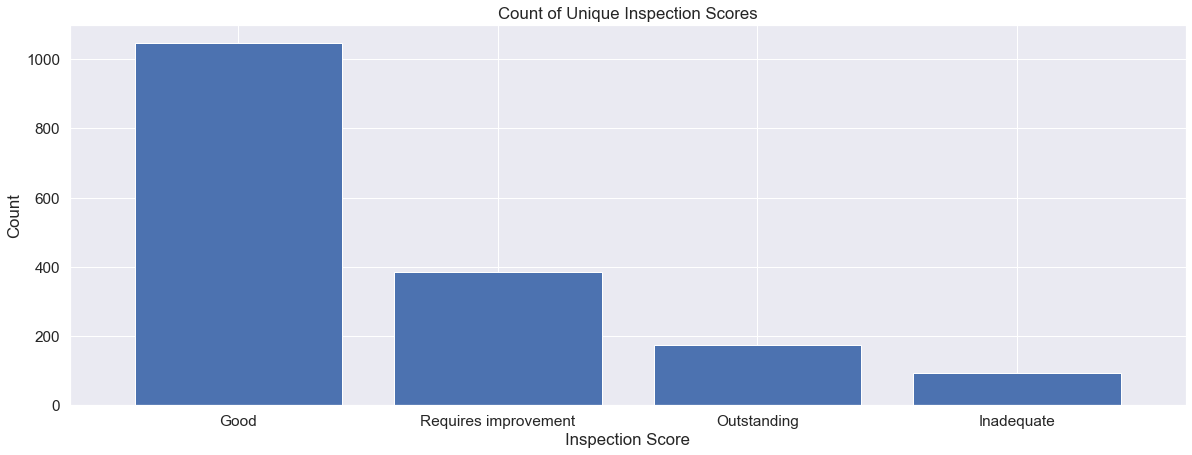

In [31]:
final_table['RECENT_SCORE'].value_counts().plot(kind='bar', width = 0.8, figsize=(20,7))

plt.xticks(rotation = 0)
plt.xlabel('Inspection Score')
plt.ylabel('Count')
plt.title('Count of Unique Inspection Scores')
plt.show()

In [28]:
previous_counts = final_table['OLD_SCORE'].value_counts()
current_counts = final_table['RECENT_SCORE'].value_counts()

ofsted_comparisons = pd.DataFrame({'Previous': previous_counts,
                                  'Recent' : current_counts})

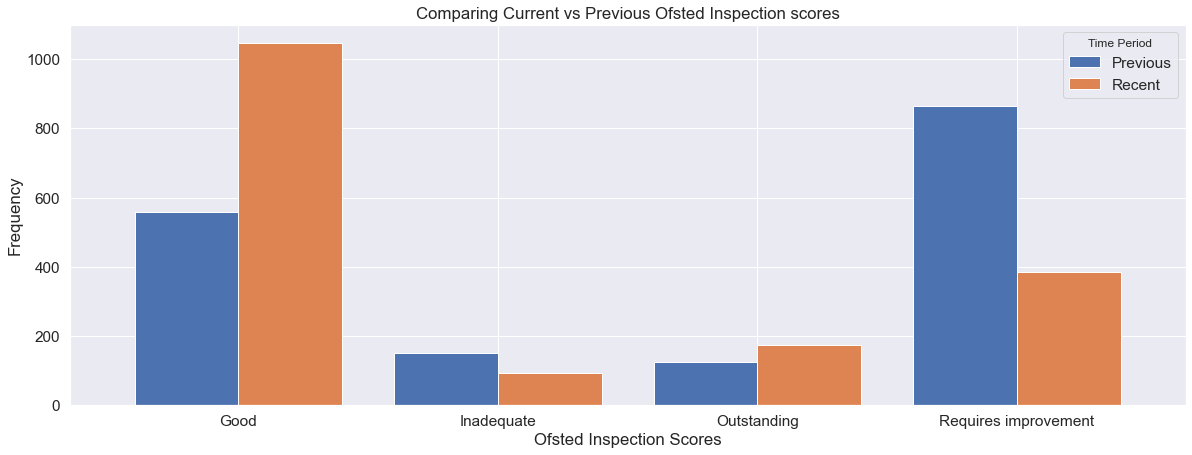

In [29]:
ofsted_comparisons.plot(kind = 'bar', width = 0.8, figsize=(20,7))

plt.title('Comparing Current vs Previous Ofsted Inspection scores')
plt.xlabel('Ofsted Inspection Scores')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.legend(title = 'Time Period')
plt.show()

## ISPOST16

In [30]:
distribution = final_table.groupby(["ISPOST16"]).size().to_frame(name = 'count').reset_index()
distribution['proportion'] = distribution['count']/sum(distribution['count'])*100

post_16 = {0.0 : "No", 
          1.0 : "Yes"} 

distribution = distribution.replace({"ISPOST16": post_16})

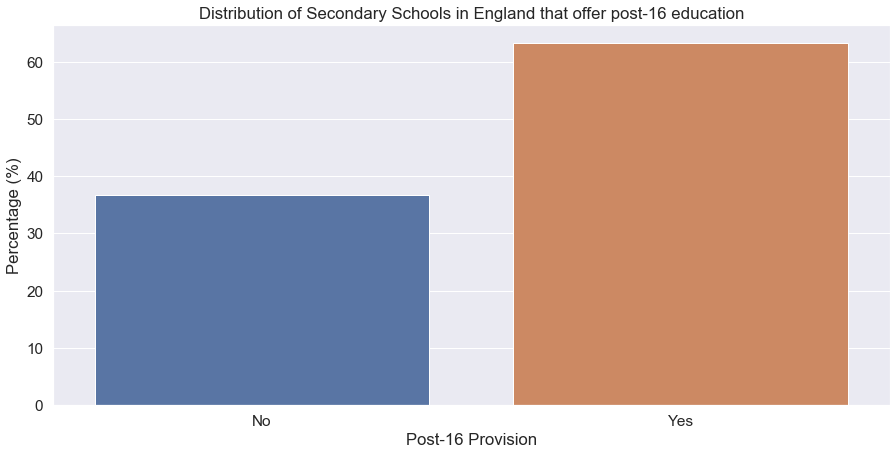

In [31]:
# plot the graph
fig, ax = plt.subplots(figsize=(15,7))

sns.barplot(data = distribution, 
            x = 'ISPOST16', 
            y = 'proportion')\
.set(title = 'Distribution of Secondary Schools in England that offer post-16 education', 
     xlabel = 'Post-16 Provision', 
     ylabel = 'Percentage (%)')


plt.show()

In [33]:
distribution_minor = final_table.groupby(["MINORGROUP"]).size().to_frame(name = 'count').reset_index()
distribution_minor['proportion'] = distribution_minor['count']/sum(distribution_minor['count'])*100

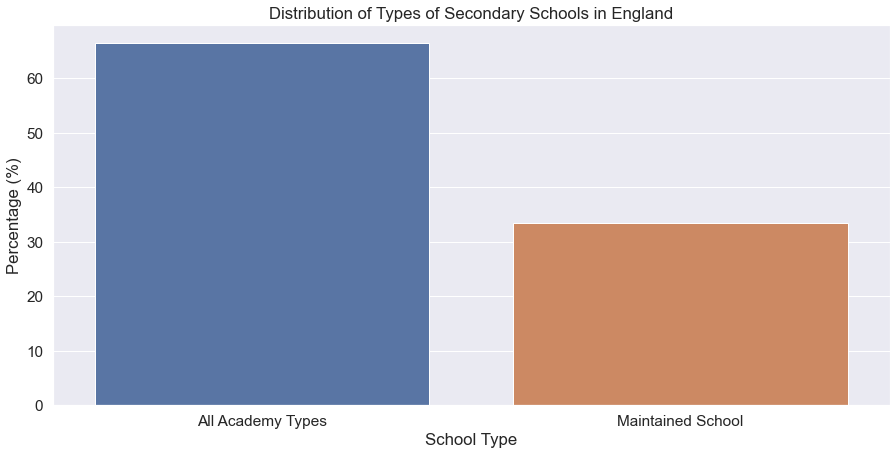

In [34]:
# plot the graph
fig, ax = plt.subplots(figsize=(15,7))

sns.barplot(data = distribution_minor, 
            x = 'MINORGROUP', 
            y = 'proportion')\
.set(title = 'Distribution of Types of Secondary Schools in England', 
     xlabel = 'School Type', 
     ylabel = 'Percentage (%)')

plt.show()

In [35]:
distribution_religion = final_table.groupby(["RELDENOM"]).size().to_frame(name = 'count').reset_index()
distribution_religion['proportion'] = distribution_religion['count']/sum(distribution_religion['count'])*100

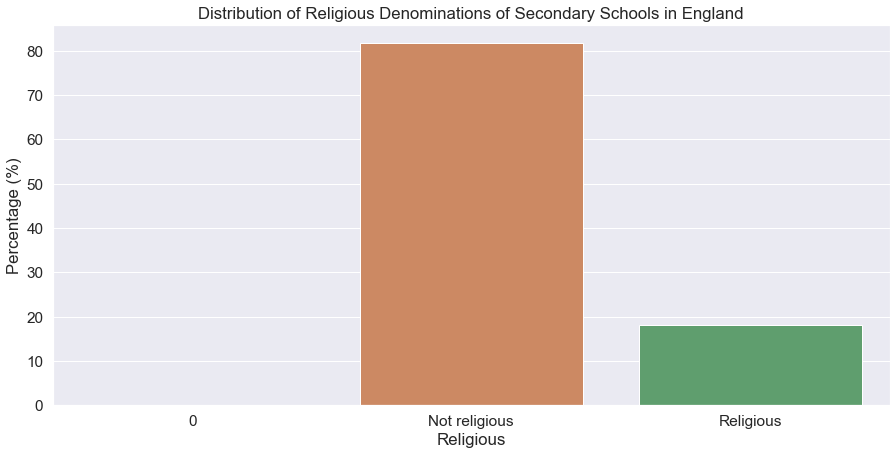

In [36]:
# plot the graph
fig, ax = plt.subplots(figsize=(15,7))

sns.barplot(data = distribution_religion, 
            x = 'RELDENOM', 
            y = 'proportion')\
.set(title = 'Distribution of Religious Denominations of Secondary Schools in England', 
     xlabel = 'Religious', 
     ylabel = 'Percentage (%)')


plt.show()

In [37]:
distribution_previous = final_table.groupby(["OLD_CONCERN"]).size().to_frame(name = 'count').reset_index()
distribution_previous['proportion'] = distribution_previous['count']/sum(distribution_previous['count'])*100

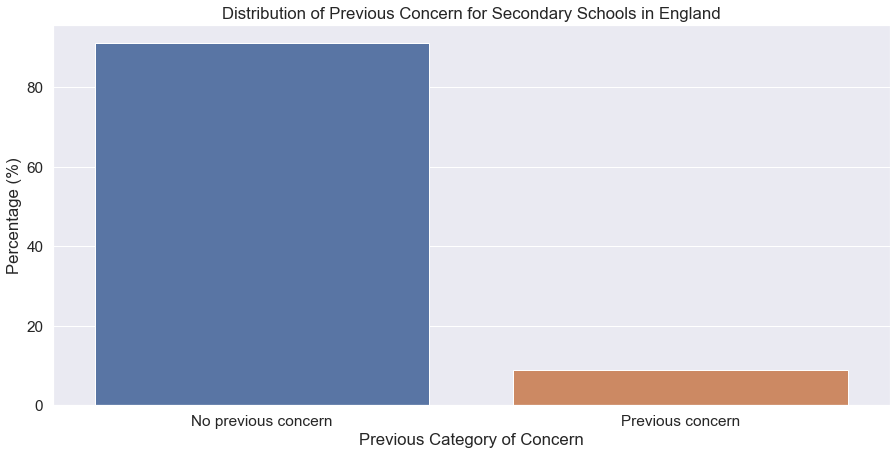

In [38]:
# plot the graph
fig, ax = plt.subplots(figsize=(15,7))

sns.barplot(data = distribution_previous, 
            x = 'OLD_CONCERN', 
            y = 'proportion')\
.set(title = 'Distribution of Previous Concern for Secondary Schools in England', 
     xlabel = 'Previous Category of Concern', 
     ylabel = 'Percentage (%)')


plt.show()

In [39]:
distribution_IDACI = final_table.groupby(["IDACI_DECILE"]).size().to_frame(name = 'count').reset_index()
distribution_IDACI['proportion'] = distribution_IDACI['count']/sum(distribution_IDACI['count'])*100

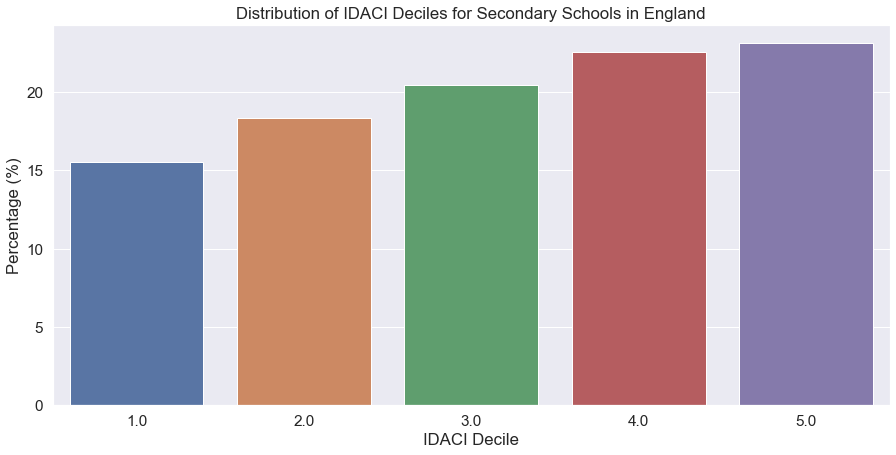

In [40]:
# plot the graph
fig, ax = plt.subplots(figsize=(15,7))

sns.barplot(data = distribution_IDACI, 
            x = 'IDACI_DECILE', 
            y = 'proportion')\
.set(title = 'Distribution of IDACI Deciles for Secondary Schools in England', 
     xlabel = 'IDACI Decile', 
     ylabel = 'Percentage (%)')


plt.show()

# Distributions of continuous variables - considering all

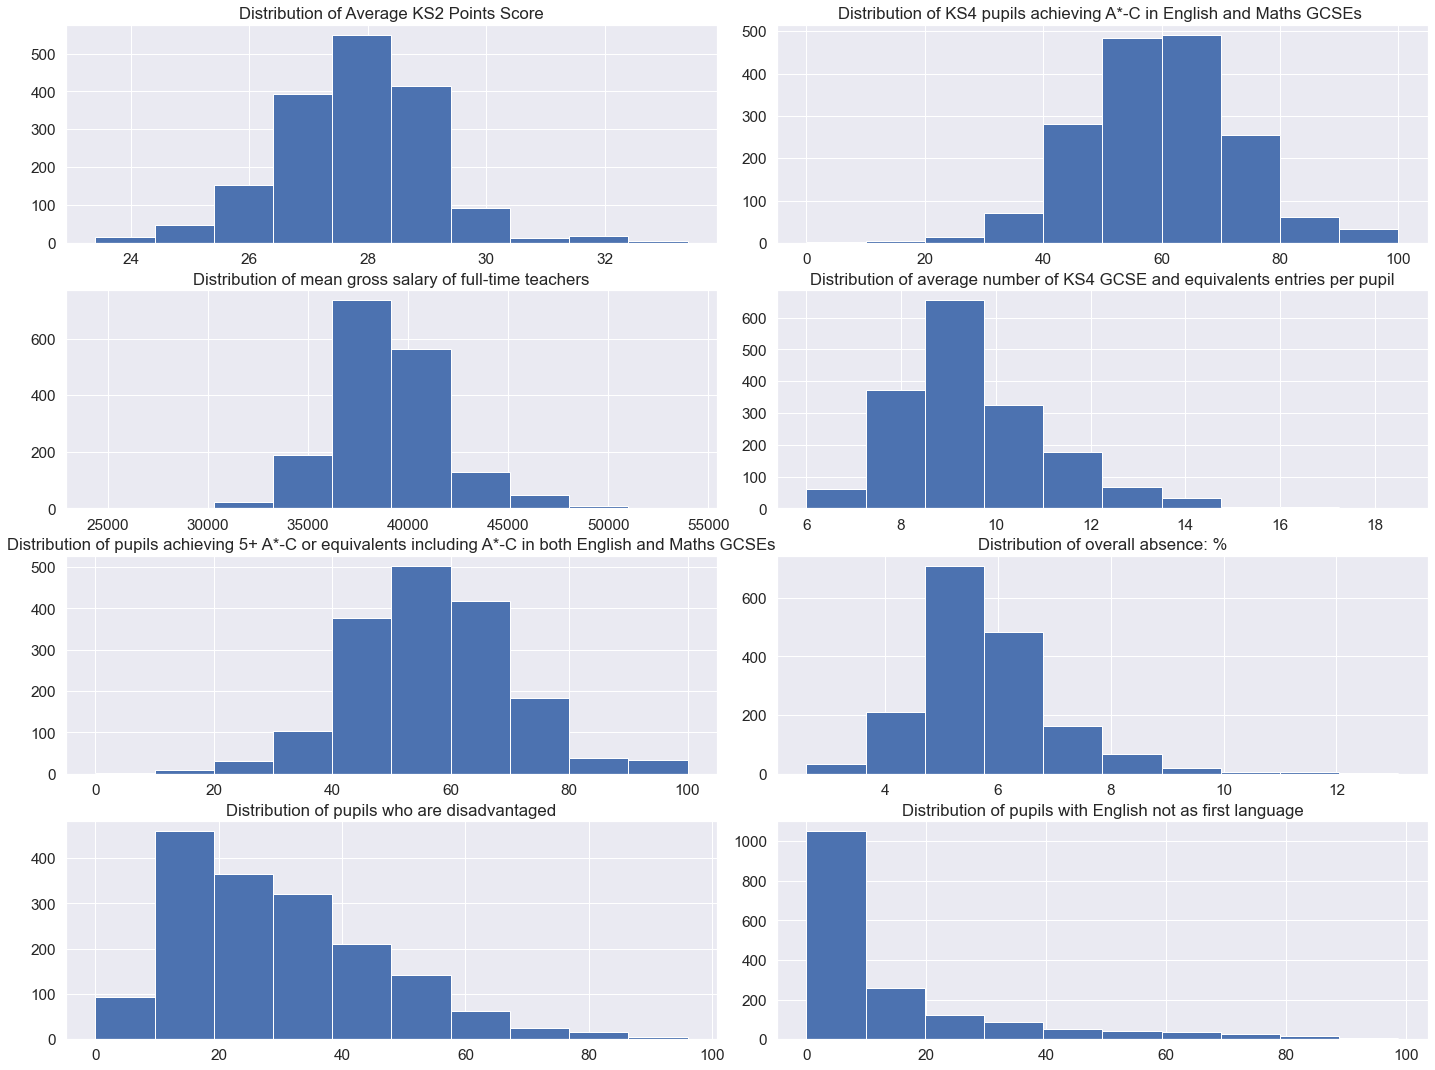

In [49]:
fig, axes = plt.subplots(nrows=4, ncols=2,
                         figsize = (20 , 15))

fig.tight_layout()

ax = axes[0,0]
ax.hist(final_table["KS2APS"]) 
ax.set_title("Distribution of Average KS2 Points Score")

ax = axes[0,1]
ax.hist(final_table["PTL2BASICS"]) 
ax.set_title("Distribution of KS4 pupils achieving A*-C in English and Maths GCSEs ")

ax = axes[1,0]
ax.hist(final_table["SALARY"]) 
ax.set_title("Distribution of mean gross salary of full-time teachers")

ax = axes[1,1]
ax.hist(final_table["TAVENT_E"]) 
ax.set_title("Distribution of average number of KS4 GCSE and equivalents entries per pupil")

ax = axes[2,0]
ax.hist(final_table["PTAC5EM"]) 
ax.set_title("Distribution of pupils achieving 5+ A*-C or equivalents including A*-C in both English and Maths GCSEs")

ax = axes[2,1]
ax.hist(final_table["PERCTOT"]) 
ax.set_title("Distribution of overall absence: %")

ax = axes[3,0]
ax.hist(final_table["PTFSMCLA"]) 
ax.set_title("Distribution of pupils who are disadvantaged")

ax = axes[3,1]
ax.hist(final_table["PNUMEAL"]) 
ax.set_title("Distribution of pupils with English not as first language")

plt.show()

# Looking at links between variables and Ofsted Inspection scores

### Comapring Inspections scores with A*-C attainment at KS4

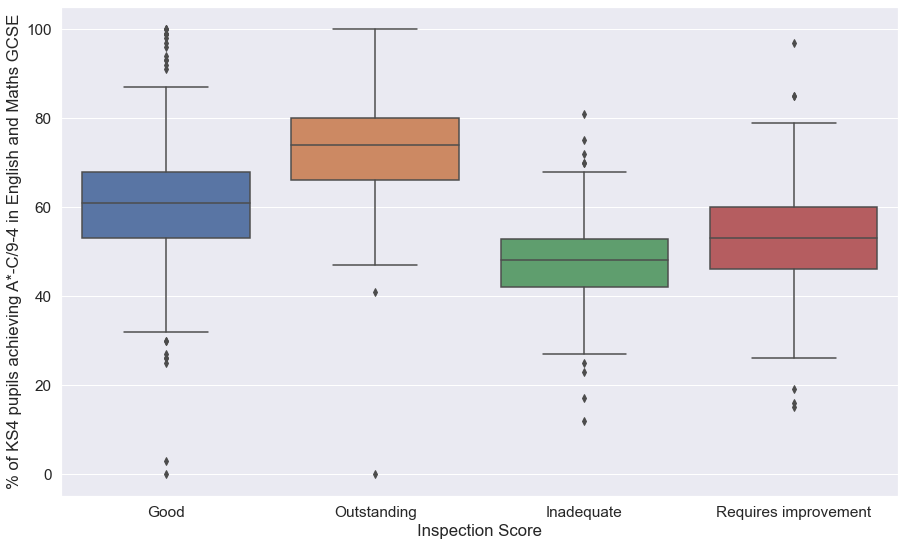

In [50]:
fig, ax = plt.subplots(figsize=(15,9))

sns.boxplot(x = "RECENT_SCORE", 
            y = "PTL2BASICS", 
            data = final_table).set(xlabel='Inspection Score', 
                                    ylabel='% of KS4 pupils achieving A*-C/9-4 in English and Maths GCSE')
plt.show()

### Comapring Inspections scores with Teacher Salary

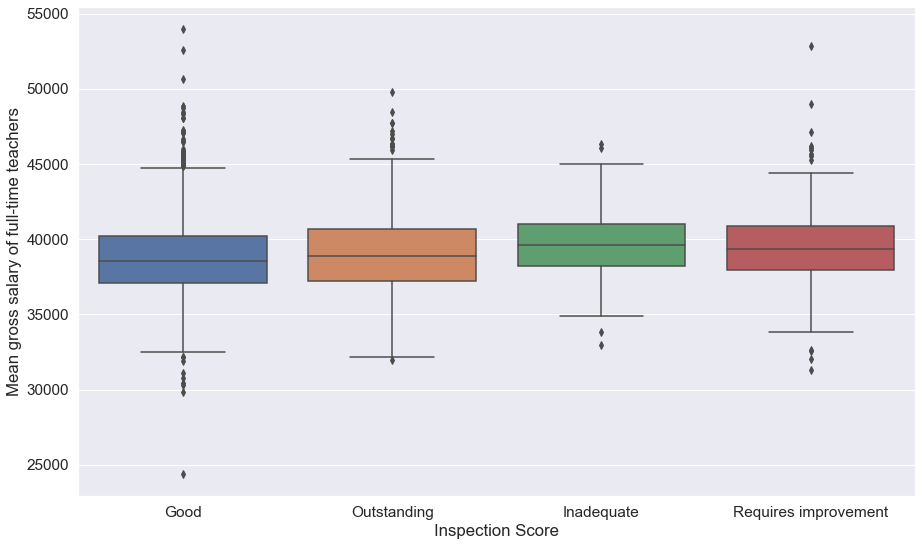

In [51]:
fig, ax = plt.subplots(figsize=(15,9))

sns.boxplot(x = "RECENT_SCORE", 
            y = "SALARY", 
            data = final_table).set(xlabel='Inspection Score', 
                                    ylabel='Mean gross salary of full-time teachers')

plt.show()

### Comapring Inspections scores with Free School Meal (FSM) Eligibility

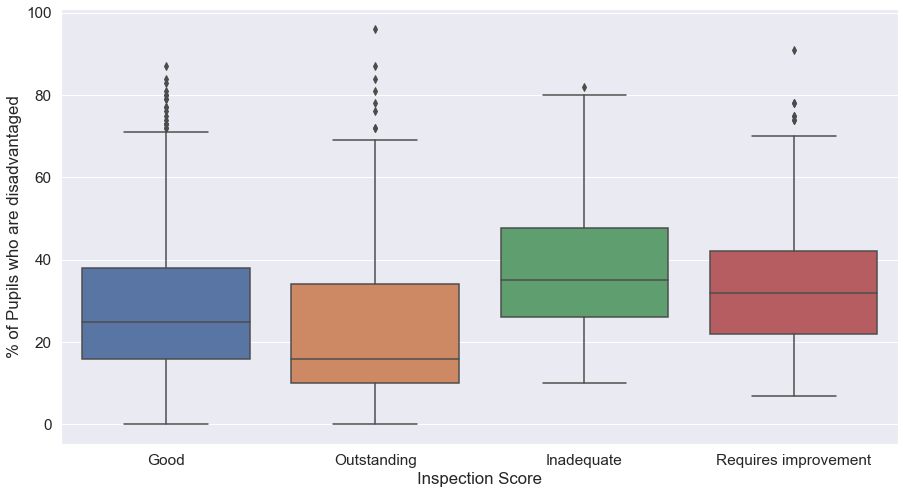

In [52]:
fig, ax = plt.subplots(figsize=(15,8))

sns.boxplot(x = "RECENT_SCORE", 
            y = "PTFSMCLA", 
            data = final_table).set(xlabel='Inspection Score', 
                                    ylabel='% of Pupils who are disadvantaged')

plt.show()

### IDACI Quintiles

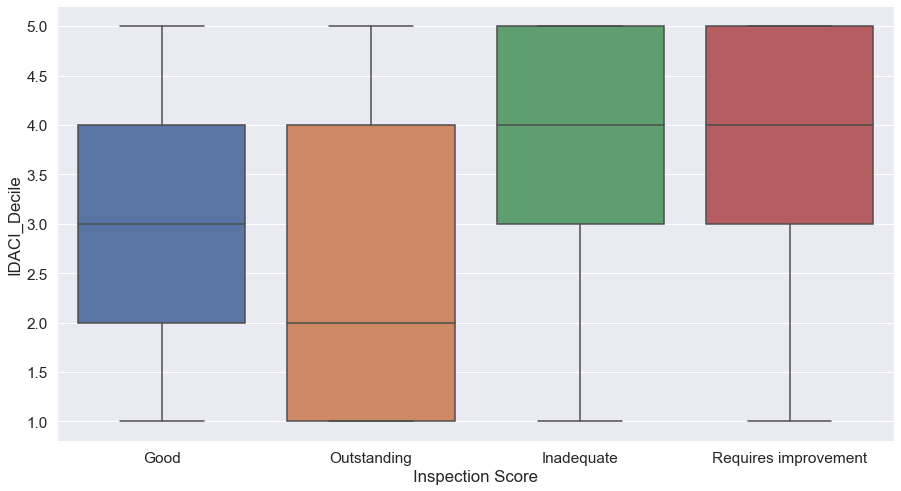

In [53]:
fig, ax = plt.subplots(figsize=(15,8))

sns.boxplot(x = "RECENT_SCORE", 
            y = "IDACI_DECILE", 
            data = final_table).set(xlabel='Inspection Score', 
                                    ylabel='IDACI_Decile')

plt.show()

#  

# Comparing distributions of KS4 variables for post and pre-2017

In [54]:
pre_2017 = pd.concat([ks4_2010_2011,
                      ks4_2011_2012, 
                      ks4_2012_2013,
                      ks4_2013_2014,
                      ks4_2014_2015,
                      ks4_2015_2016], 
                     ignore_index=True)

post_2017 = pd.concat([ks4_2016_2017,
                       ks4_2017_2018], 
                      ignore_index=True)

pre_2017 = pre_2017.apply(lambda x: x.astype(str).str.replace('%',''))

post_2017 = post_2017.apply(lambda x: x.astype(str).str.replace('%',''))

pre_2017["PTAC5EM"] =  pre_2017['PTAC5EM'].astype(float)
post_2017["PTAC5EM"] =  post_2017['PTAC5EM'].astype(float)

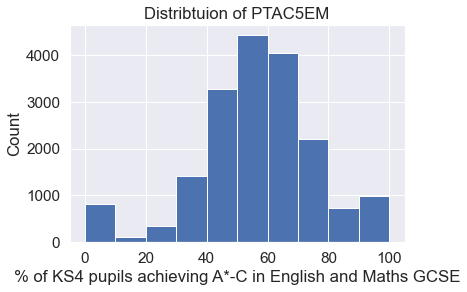

In [55]:
plt.hist(pre_2017["PTAC5EM"]) 
plt.xlabel("% of KS4 pupils achieving A*-C in English and Maths GCSE")
plt.ylabel("Count")
plt.title("Distribtuion of PTAC5EM")
plt.show() 

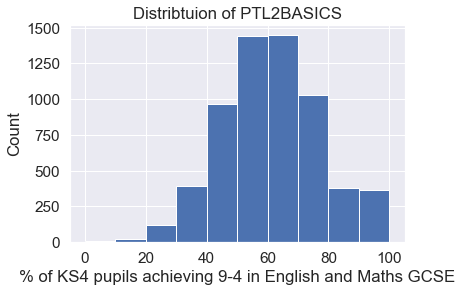

In [56]:
plt.hist(post_2017["PTAC5EM"]) 
plt.title("Distribtuion of PTL2BASICS")
plt.xlabel("% of KS4 pupils achieving 9-4 in English and Maths GCSE")
plt.ylabel("Count")
plt.show() 

##   

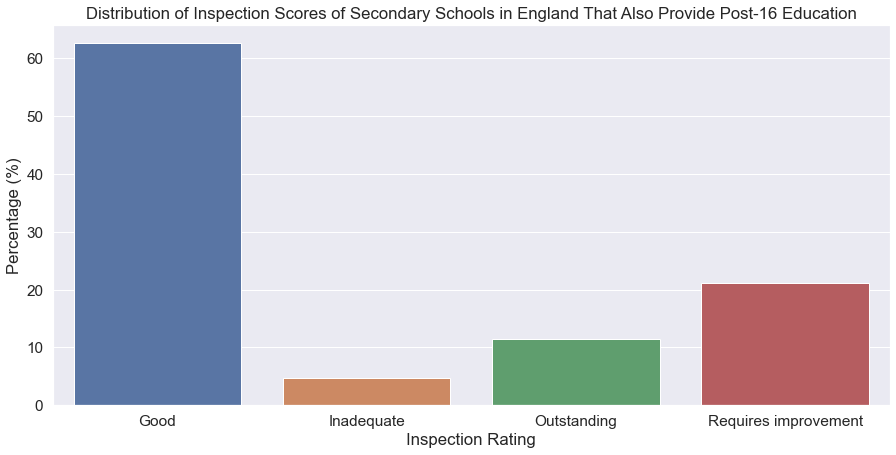

In [57]:
post16 = final_table[(final_table['ISPOST16'] == 1)]

rating_mean_post16 = post16.groupby(["RECENT_SCORE"]).size().to_frame(name = 'count').reset_index()
rating_mean_post16['proportion'] = rating_mean_post16['count']/sum(rating_mean_post16['count'])*100

# plot the graph
fig, ax = plt.subplots(figsize=(15,7))

sns.barplot(data = rating_mean_post16, 
            x = 'RECENT_SCORE', 
            y = 'proportion')\
.set(title='Distribution of Inspection Scores of Secondary Schools in England That Also Provide Post-16 Education', 
     xlabel='Inspection Rating', 
     ylabel='Percentage (%)')


plt.show()

##   

# LA maps. Join the data table to the la and region codes table and then a shapefile to plot

In [59]:
# Import the la and region codes table
regions_and_la = pd.read_csv('D:\\Schools Data\\Metadata\\2018-2019\\la_and_region_codes_meta.csv')

# Join the OFSTED inspection score data and the school data
regions = pd.merge(final_table, 
                   regions_and_la, 
                   how = 'outer',
                   on = 'LEA')


# Rename 'LA Name' to CTYNME
dict = {'LA Name' : 'CTYNME'}
 
regions.rename(columns=dict,
               inplace=True)

In [60]:
regions = regions.dropna()

In [62]:
import geopandas as gpd

shapefile_path = "D:\\UTLA Shapefiles\\Upper Local Authorities\\Upper Local Authorites.shp"
utla = gpd.read_file(shapefile_path)

In [63]:
shapefile_path = "D:\\LTLA Shapefiles\\LAD_DEC_2022_UK_BFC.shp"
ltla = gpd.read_file(shapefile_path)

### Average Teacher Salary by Local Authority

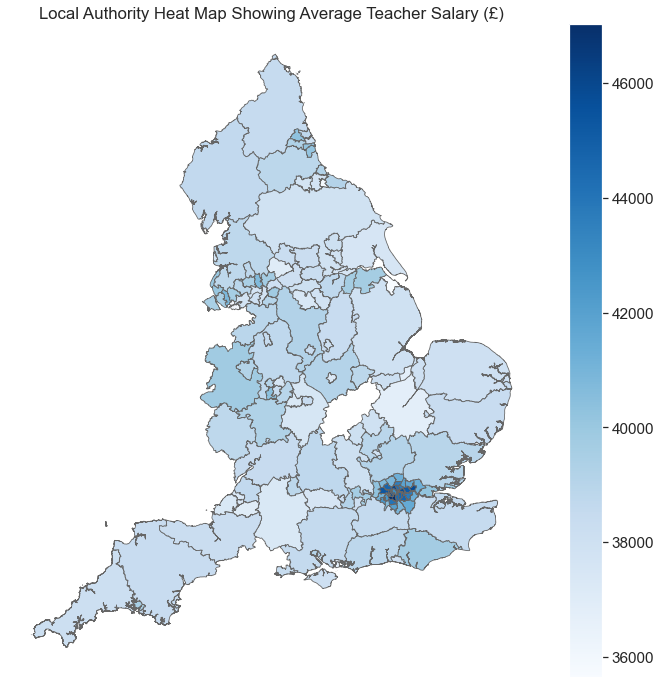

In [64]:
mean_salary = regions.groupby(['CTYNME'])['SALARY'].mean()

mean_salary = utla.merge(mean_salary, 
                         on = 'CTYNME')

fig, ax = plt.subplots(figsize = (12, 12)) # Size of the graph

mean_salary.plot(column = 'SALARY', # State the column you want to plot
                 cmap = 'Blues', # The colour scheme
                 linewidth = 0.8, # The width of the border lines
                 edgecolor = '0.4', # Changes the colour of the LA borders (not sure what colour each number is)
                 legend = True, # Whether you want the legend 
                 ax = ax) # State the axis you want to plot on

ax.axis('off') # Turn of the axis labels
plt.title("Local Authority Heat Map Showing Average Teacher Salary (£)")

plt.show()

### IDACI Quintiles by Local Authority

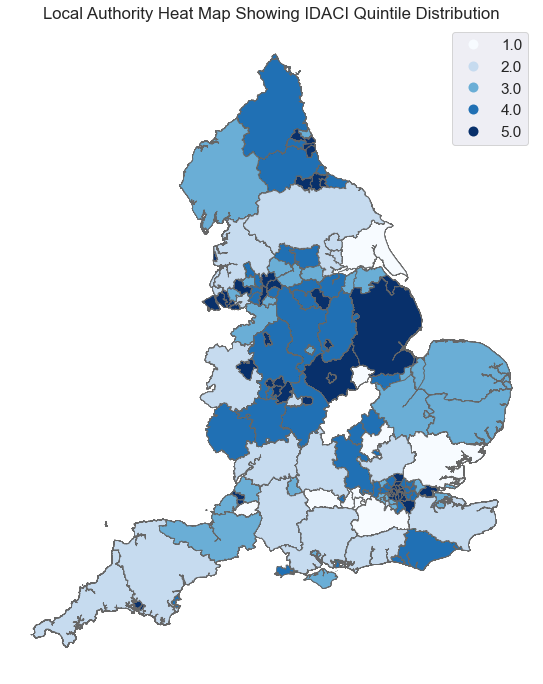

In [71]:
idaci_map = utla.merge(regions, 
                       on = 'CTYNME')

idaci_map['IDACI_DECILE'] = pd.Categorical(idaci_map.IDACI_DECILE)


fig, ax = plt.subplots(figsize = (12, 12)) # Size of the graph

idaci_map.plot(column = 'IDACI_DECILE', # State the column you want to plot
               cmap = 'Blues', # The colour scheme
               linewidth = 0.8, # The width of the border lines
               edgecolor = '0.4', # Changes the colour of the LA borders (not sure what colour each number is)
               legend = True, # Whether you want the legend 
               ax = ax) # State the axis you want to plot on

ax.axis('off') # Turn of the axis labels
plt.title("Local Authority Heat Map Showing IDACI Quintile Distribution")

plt.show()

#  

### Ofsted Rating Trends

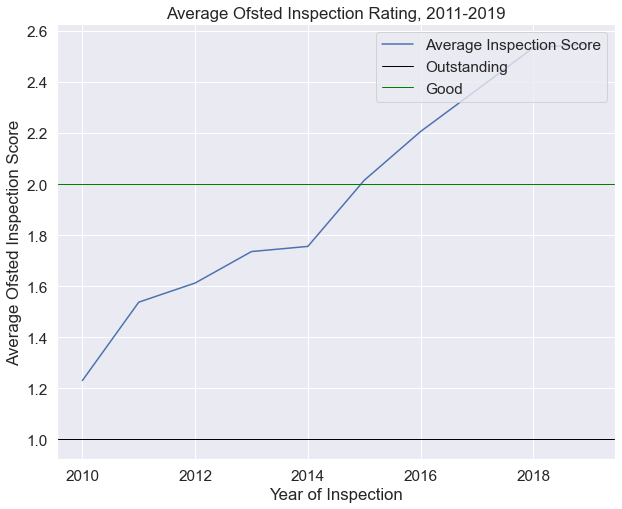

In [69]:
rslt_df = latest_ratings[latest_ratings['ACADEMIC_YEAR'] != 2009] 
rslt_df = rslt_df[rslt_df['ACADEMIC_YEAR'] != 2020] 

dict = {'Overall_effectiveness': 'Average Inspection Score'}
rslt_df.rename(columns=dict, inplace=True)
rslt_df[['ACADEMIC_YEAR','Average Inspection Score']].apply(pd.to_numeric)

df = rslt_df.groupby(['ACADEMIC_YEAR'])['Average Inspection Score'].mean()

fig, ax = plt.subplots(figsize=(10, 8))

df.plot()
plt.axhline(y = 1,
            linewidth = 1, 
            color = 'black',
            label = 'Outstanding')

plt.axhline(y = 2,
            linewidth = 1, 
            color = 'green',
            label = 'Good')

l = plt.legend(loc ='upper right') 


plt.title("Average Ofsted Inspection Rating, 2011-2019")
plt.xlabel("Year of Inspection")
plt.ylabel("Average Ofsted Inspection Score")
plt.show()

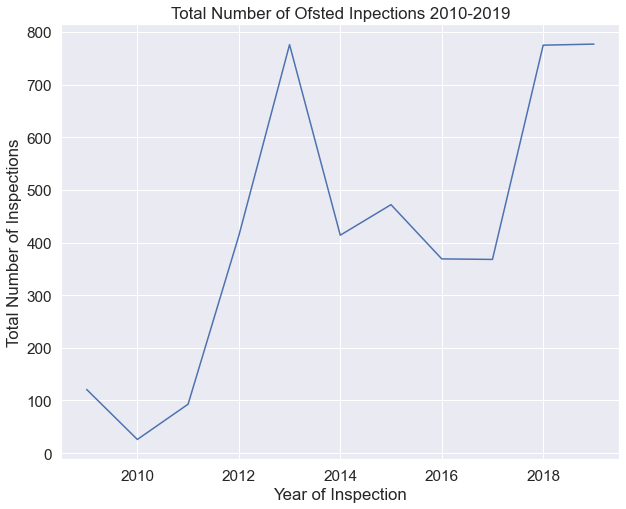

In [79]:
# Frequency of inspections
rslt_df = latest_ratings[latest_ratings['ACADEMIC_YEAR'] != 2009] 
rslt_df = latest_ratings[latest_ratings['ACADEMIC_YEAR'] != 2020] 

rslt_df[['ACADEMIC_YEAR']].apply(pd.to_numeric)

df = rslt_df.groupby('ACADEMIC_YEAR').size()

fig, ax = plt.subplots(figsize=(10, 8))

df.plot()

plt.title("Total Number of Ofsted Inpections 2010-2019")
plt.xlabel("Year of Inspection")
plt.ylabel("Total Number of Inspections")
plt.show()

##  